In [1]:
import numpy as np
import matplotlib.pyplot as plt

results_path = "results_feature.txt"

In [2]:
with open(results_path, "r") as f:
    lines = f.readlines()[1:]

exList = []
eyList = []
errorList = []
pxList = []
pyList = []
distanceList = []
directionList = []
densityList = []
intensityList = []
heightList = []
lengthList = []
widthList = []
volumeList = []
orientationList = []
confidenceList = []
for line in lines:
    data = line.split()
    exList.append(float(data[1]))
    eyList.append(float(data[2]))
    pxList.append(float(data[3]))
    pyList.append(float(data[4]))
    densityList.append(float(data[5]))
    intensityList.append(float(data[6]))
    heightList.append(float(data[7]))
    lengthList.append(float(data[8]))
    widthList.append(float(data[9]))
    orientationList.append(float(data[10]))
    confidenceList.append(float(data[11]))
    distanceList.append(np.sqrt((float(data[3])**2 + float(data[4])**2)))
    directionList.append(np.arctan2(float(data[4]), float(data[3])))
    volumeList.append(float(data[7])*float(data[8])*float(data[9]))
    errorList.append(np.sqrt((float(data[1])**2 + float(data[2])**2)))

In [7]:
def analyzeFeature(featureList, errorList, title, N, index):
    
    plt.subplot(2, N, index)
    plt.hist(featureList, bins=100)
    plt.title("hist of " + title)
    plt.xlabel(title)
    plt.ylabel("count")

    minNum = 50
    featureList = np.array(featureList)
    errorList = np.array(errorList)
    minBin = np.min(featureList)
    maxBin = np.max(featureList)
    step = (maxBin - minBin) / 100
    bins = np.arange(minBin, maxBin, step)
    stdList = []
    for d in bins:
        mask = (featureList >= d) & (featureList < d+1)
        if mask.sum() > minNum:
            stdList.append(np.std(np.array(errorList)[mask]))
        else:
            stdList.append(0)
    mask = np.array(stdList) > 0
    maxBin = np.max(bins[mask])
    step = (maxBin - minBin) / 100
    bins = np.arange(minBin, maxBin, step)
    stdList = []
    for d in bins:
        mask = (featureList >= d) & (featureList < d+1)
        if mask.sum() > minNum:
            stdList.append(np.std(np.array(errorList)[mask]))
        else:
            stdList.append(0)
    # plot the std of error in each bin
    mask = np.array(stdList) > 0
    plt.subplot(2, N, index + N)
    plt.plot(bins[mask], np.array(stdList)[mask])
    plt.xlabel(title)
    plt.ylabel("std of error")
    plt.title("std of error in each bin")

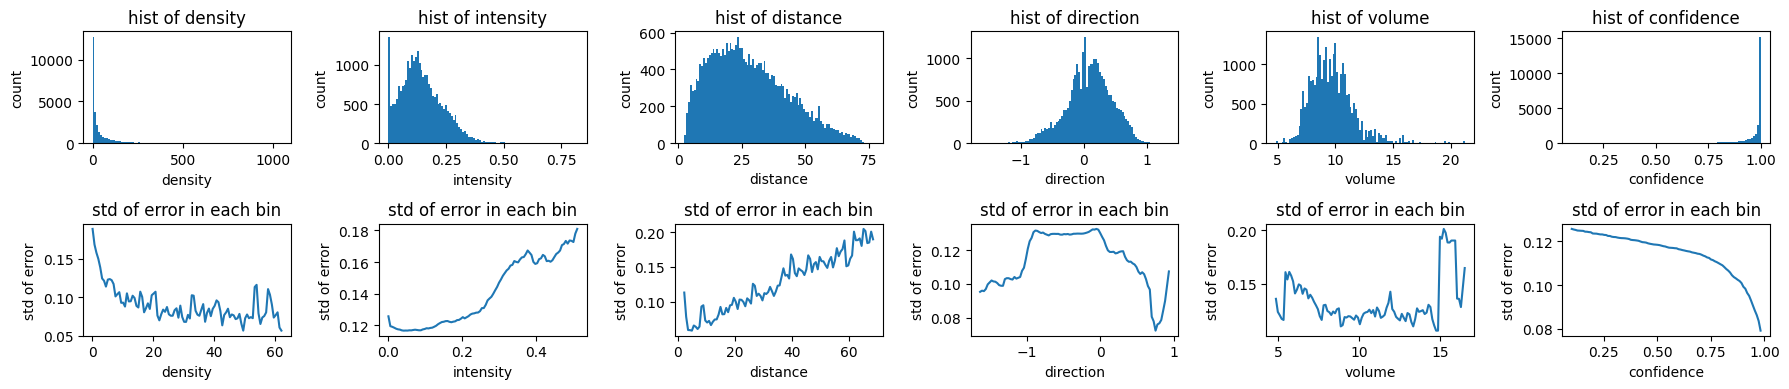

In [8]:
plt.figure(figsize=(18, 4))
analyzeFeature(densityList, errorList, "density", 6, 1)
analyzeFeature(intensityList, errorList, "intensity", 6, 2)
analyzeFeature(distanceList, errorList, "distance", 6, 3)
analyzeFeature(directionList, errorList, "direction", 6, 4)
analyzeFeature(volumeList, errorList, "volume", 6, 5)
analyzeFeature(confidenceList, errorList, "confidence", 6, 6)
plt.tight_layout()  # 自动调整子图间的间距  
plt.show()  # 显示图形  

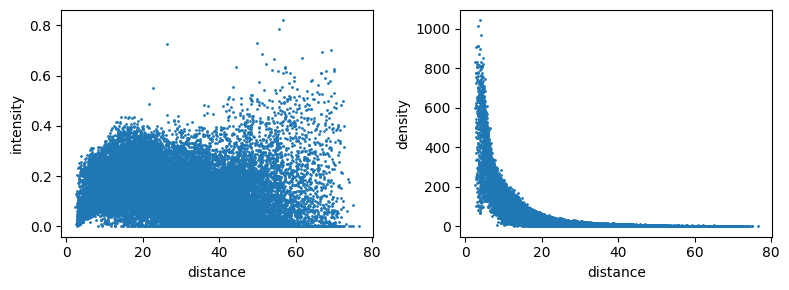

In [5]:
# hist of distance
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(distanceList, intensityList, "o", markersize=1)
plt.xlabel("distance")
plt.ylabel("intensity")
plt.subplot(1, 2, 2)
plt.plot(distanceList, densityList, "o", markersize=1)
plt.xlabel("distance")
plt.ylabel("density")
plt.tight_layout()  # 自动调整子图间的间距
plt.show()

stepDistance:  1.350549308822723
stepIntensity:  0.006559999999999999
num of zero std grid:  1005
num of total grid:  2500


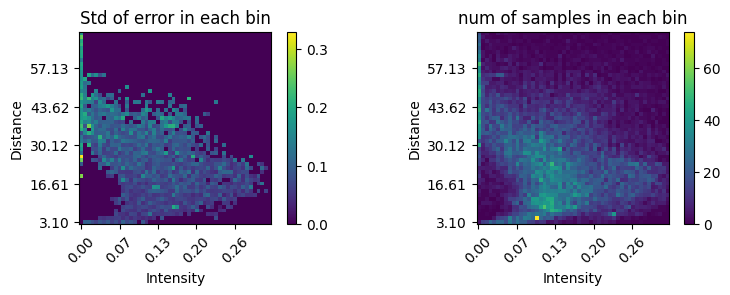

In [6]:
# choose distance and intensity as features
N1 = 100
N2 = 50
minNumData = 10
maxBinDistance = max(distanceList)
minBinDistance = min(distanceList)
stepDistance = (maxBinDistance - minBinDistance) / N1
binsDistance = np.arange(minBinDistance, maxBinDistance, stepDistance)
maxBinIntensity = max(intensityList)
minBinIntensity = min(intensityList)
stepIntensity = (maxBinIntensity - minBinIntensity) / N1
binsIntensity = np.arange(minBinIntensity, maxBinIntensity, stepIntensity)
errorListGrid = [[[] for _ in range(len(binsIntensity))] for _ in range(len(binsDistance))]
numGrid = np.zeros((len(binsDistance), len(binsIntensity)))
stdGrid = np.zeros((len(binsDistance), len(binsIntensity)))
for i in range(len(distanceList)):
    indexDistance = int((distanceList[i] - minBinDistance) / stepDistance)
    indexIntensity = int((intensityList[i] - minBinIntensity) / stepIntensity)
    if 0 <= indexDistance < len(binsDistance) and 0 <= indexIntensity < len(binsIntensity):
        errorListGrid[indexDistance][indexIntensity].append(errorList[i])
        numGrid[indexDistance, indexIntensity] += 1
for i in range(len(binsDistance)):
    for j in range(len(binsIntensity)):
        if numGrid[i, j] > minNumData:
            stdGrid[i, j] = np.std(errorListGrid[i][j])
        else:
            stdGrid[i, j] = 0
mask = stdGrid > 0

# adjust maxBin and minBin
maxBinDistance = max(binsDistance[mask.any(axis=1)])
minBinDistance = min(binsDistance[mask.any(axis=1)])
maxBinIntensity = max(binsIntensity[mask.any(axis=0)])
minBinIntensity = min(binsIntensity[mask.any(axis=0)])
stepDistance = (maxBinDistance - minBinDistance) / N2
stepIntensity = (maxBinIntensity - minBinIntensity) / N2
binsDistance = np.arange(minBinDistance, maxBinDistance, stepDistance)
binsIntensity = np.arange(minBinIntensity, maxBinIntensity, stepIntensity)
numGrid = np.zeros((len(binsDistance), len(binsIntensity)))
stdGrid = np.zeros((len(binsDistance), len(binsIntensity)))
for i in range(len(distanceList)):
    indexDistance = int((distanceList[i] - minBinDistance) / stepDistance)
    indexIntensity = int((intensityList[i] - minBinIntensity) / stepIntensity)
    if 0 <= indexDistance < len(binsDistance) and 0 <= indexIntensity < len(binsIntensity):
        errorListGrid[indexDistance][indexIntensity].append(errorList[i])
        numGrid[indexDistance, indexIntensity] += 1
for i in range(len(binsDistance)):
    for j in range(len(binsIntensity)):
        if numGrid[i, j] > minNumData:
            stdGrid[i, j] = np.std(errorListGrid[i][j])
        else:
            stdGrid[i, j] = 0
mask = stdGrid > 0

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)  
plt.imshow(stdGrid, interpolation='nearest', origin='lower')  
plt.colorbar()  
plt.title("Std of error in each bin")  
plt.xlabel("Intensity")  
plt.ylabel("Distance")  
plt.xticks(range(len(binsIntensity))[::10], ["{:.2f}".format(x) for x in binsIntensity[::10]], rotation=45)  
plt.yticks(range(len(binsDistance))[::10], ["{:.2f}".format(x) for x in binsDistance[::10]])  

plt.subplot(1, 2, 2)
plt.imshow(numGrid, interpolation='nearest', origin='lower')
plt.colorbar()
plt.title("num of samples in each bin")
plt.xlabel("Intensity")
plt.ylabel("Distance")
plt.xticks(range(len(binsIntensity))[::10], ["{:.2f}".format(x) for x in binsIntensity[::10]], rotation=45)
plt.yticks(range(len(binsDistance))[::10], ["{:.2f}".format(x) for x in binsDistance[::10]])

plt.title("num of samples in each bin")
plt.tight_layout()

numNonZeroGrid = np.sum(mask)
print("stepDistance: ", stepDistance)
print("stepIntensity: ", stepIntensity)
print("num of zero std grid: ", numNonZeroGrid)
print("num of total grid: ", len(binsDistance)*len(binsIntensity))


In [7]:
# save the grid data
results_feature_grid_path = "results_feature_grid.txt"
with open(results_feature_grid_path, "w") as f:
    f.write("stepDistance: " + str(stepDistance) + "\n")
    f.write("stepIntensity: " + str(stepIntensity) + "\n")
    f.write("num of zero std grid: " + str(numNonZeroGrid) + "\n")
    f.write("num of total grid: " + str(len(binsDistance)*len(binsIntensity)) + "\n")
    f.write("maxDistance: " + str(maxBinDistance) + "\n")
    f.write("minDistance: " + str(minBinDistance) + "\n")
    f.write("maxIntensity: " + str(maxBinIntensity) + "\n")
    f.write("minIntensity: " + str(minBinIntensity) + "\n")
    f.write("distance\tintensity\tstd\n")
    for i in range(len(binsDistance)):
        for j in range(len(binsIntensity)):
            if mask[i, j]:
                f.write(f"{binsDistance[i]+stepDistance/2:.04f}\t\t{binsIntensity[j]+stepIntensity/2:.04f}\t\t{stdGrid[i, j]:.04f}\n")



In [18]:
# save error, distance, intensity and std
results_feature_error_path = "results_feature_error.txt"
with open(results_feature_error_path, "w") as f:
    f.write("error_x\t\terror_y\t\tpx\t\t\tpy\t\t\tdensity\t\tintensity\tstd\n")
    for i in range(len(distanceList)):
        indexDistance = int((distanceList[i] - minBinDistance) / stepDistance)
        indexIntensity = int((intensityList[i] - minBinIntensity) / stepIntensity)
        if 0 <= indexDistance < len(binsDistance) and 0 <= indexIntensity < len(binsIntensity):
            if stdGrid[indexDistance, indexIntensity] > 0:
                f.write(f"{exList[i]:.03f}\t\t{eyList[i]:.03f}\t\t{pxList[i]:.03f}\t\t{pyList[i]:.03f}\t\t{densityList[i]:.03f}\t\t{intensityList[i]:.03f}\t\t{stdGrid[indexDistance, indexIntensity]:.03f}\n")